In [15]:
import cv2
from PIL import Image
from cv2 import imshow
import numpy as np
import pandas as pd
import zipfile
import tensorflow
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
tensorflow.__version__

'2.5.0'

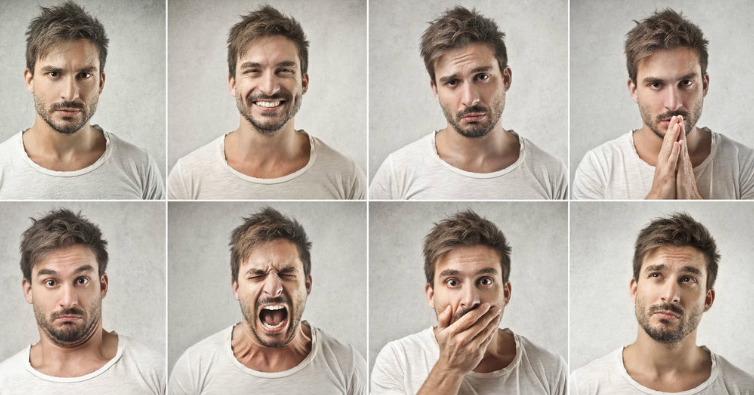

In [47]:
imagem = cv2.imread('Testing Faces/testes/teste02.jpg')
Image.fromarray(imagem[:,:,::-1])

In [48]:
#Carregamento dos modelos
cascade_faces = "Testing Faces/haarcascade_frontalface_default.xml"
#caminho da rede neural pré treinada
caminho_modelo = "Testing Faces/modelo_01_expressoes.h5"
#objeto especifico para deteccao de faces
face_detection = cv2.CascadeClassifier(cascade_faces)
classificador_emocoes = load_model(caminho_modelo, compile = False)
expressoes = ["Raiva", "Nojo", "Medo", "Feliz", "Triste", "Surpreso", "Neutro"]

In [49]:
faces = face_detection.detectMultiScale(imagem, scaleFactor = 1.2,
                                        minNeighbors = 5, minSize = (20,20))

In [50]:
faces

array([[ 18, 243, 100, 100],
       [229, 243,  84,  84],
       [625, 239,  94,  94],
       [420, 242,  97,  97],
       [417,  43, 100, 100],
       [226,  36,  88,  88],
       [ 22,  41,  92,  92],
       [625,  48,  92,  92]], dtype=int32)

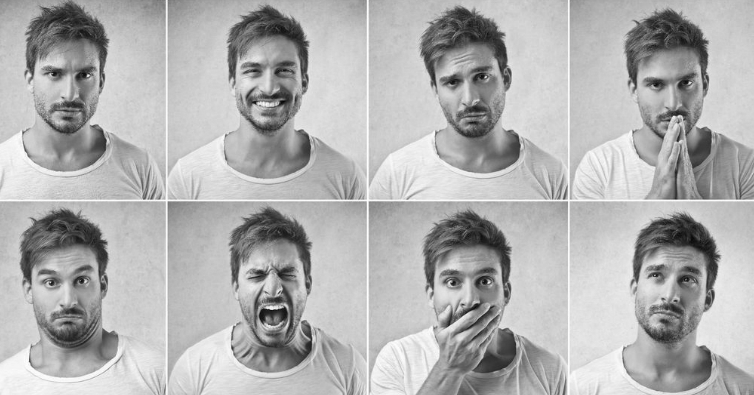

In [51]:
cinza = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
Image.fromarray(cinza)

In [54]:
original = imagem.copy()

for (x, y, w, h) in faces:
    #roi = faces[x:y + height, x2:y2+width]
    roi = cinza[y:y + h, x:x + w]
    #Redimensiona imagem
    roi = cv2.resize(roi, (48, 48))
    #Image.fromarray(roi)

    roi = roi.astype('float') / 255
    roi = img_to_array(roi)
    roi = np.expand_dims(roi, axis = 0)
    #Previsões
    preds = classificador_emocoes.predict(roi)[0]
    #print(preds)

    #Emoção detectada
    emotion_probability = np.max(preds)
    #print(preds.argmax())
    
    label = expressoes[preds.argmax()]
    print(f'Emoção encontrada: {label}')

    cv2.putText(original, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.65,
              (0,0,255), 2, cv2.LINE_AA)
    cv2.rectangle(original, (x,y), (x + w, y + h), (255,0,0), 2 )

Emoção encontrada: Neutro
Emoção encontrada: Raiva
Emoção encontrada: Neutro
Emoção encontrada: Surpreso
Emoção encontrada: Neutro
Emoção encontrada: Feliz
Emoção encontrada: Raiva
Emoção encontrada: Medo


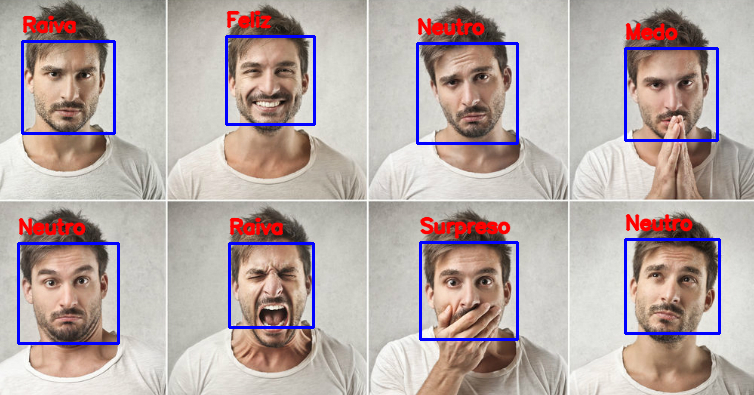

In [55]:
Image.fromarray(original[:,:,::-1])